# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

# 데이터 준비

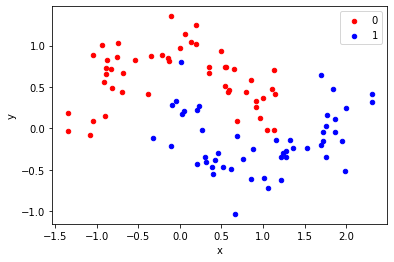

In [2]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# 학습 중 로스 그리기

In [3]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.losses = []
    self.val_losses = []


  # epoch 1번이 종료될 때 마다 호출 된다.
  def on_epoch_end(self, epoch, logs={}):

    # 받은 loss와 val_loss를 추가
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    # loss 그래프 그리기
    clear_output(wait=True)
    plt.plot(self.losses, label="loss")
    plt.plot(self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("{} epoch, loss={}, val_loss={}".format(epoch, self.losses[-1],self.val_losses[-1]))



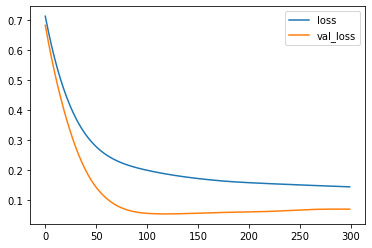

299 epoch, loss=0.14507244527339935, val_loss=0.07082255929708481


In [4]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=300, verbose=0, batch_size=32, validation_split=0.1, 
          callbacks=[plot_losses])


# 학습 중 조기 종료 - EarlyStopping

In [5]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               patience=50,         # 중지까지의 여유분
                               verbose=1)           # 조기 종료 시 출력

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[early_stopping])


# 학습 중 모델 저장 - ModelCheckpoint

In [6]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint('best_model.h5',     # 저장될 모델 파일 이름
                                    monitor='val_loss',  # 모니터링 대상
                                    save_best_only=True, # 성능 최고 일Eo만 저장
                                    verbose=1)           # 저장 시 출력

history = model.fit(train_x, train_y, epochs=300, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[model_check_point])




Epoch 00001: val_loss improved from inf to 0.62920, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.62920 to 0.60026, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.60026 to 0.57058, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.57058 to 0.54212, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.54212 to 0.51500, saving model to best_model.h5

Epoch 00006: val_loss improved from 0.51500 to 0.48963, saving model to best_model.h5

Epoch 00007: val_loss improved from 0.48963 to 0.46509, saving model to best_model.h5

Epoch 00008: val_loss improved from 0.46509 to 0.44088, saving model to best_model.h5

Epoch 00009: val_loss improved from 0.44088 to 0.41679, saving model to best_model.h5

Epoch 00010: val_loss improved from 0.41679 to 0.39339, saving model to best_model.h5

Epoch 00011: val_loss improved from 0.39339 to 0.37068, saving model to best_model.h5

Epoch 00012: val_loss improved from 0.37068 to

# 학습 중 학습율 조정 - ReduceLROnPlateau

학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [7]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              patience=25,        # 설정 기간동안 유지
                              factor=0.1,         # 줄이는 양                              
                              min_learning_rate=0.00001,     # 최소 학습율
                              verbose=1)          # 변경 시 출력

history = model.fit(train_x, train_y, epochs=300, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[reduce_lr])



# 학습 중 학습율 조정 - LearningRateScheduler

In [8]:
model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


def scheduler(epoch, lr):
  if epoch == 100:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[lr_scheduler])



learning rate changed at epcoh 100 as 0.00010000000474974513


# 모두 한번에

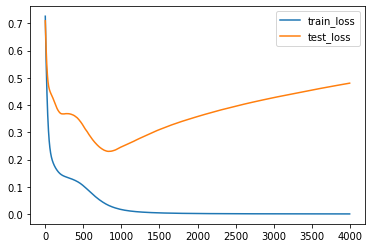

In [9]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()


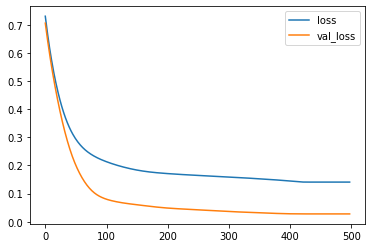

497 epoch, loss=0.14091025292873383, val_loss=0.027588343247771263
Epoch 00498: early stopping


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

history = model.fit(train_x, train_y, validation_split=0.2, epochs=4000, verbose=0, callbacks=callbacks)
